# Practice referring to the course by "Corey Schafer" in YTB

In [1]:
import pandas as pd

## **Basically read and select** 

In [2]:
df = pd.read_csv('data/survey_results_public.csv', encoding='utf-8')
df_schema = pd.read_csv('data/survey_results_schema.csv')

In [3]:
#set all the col/rows display count
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

In [4]:
df.head(3).tail(1)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange;Stack Overflow f...,A few times per month or weekly,Yes,Less than once per month or monthly,Neutral,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,23.0,Strongly agree,Neither agree nor disagree,Agree,Agree,Agree,Agree,Agree,Agree,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


In [5]:
df[['ResponseId','Employment']].head()

,ResponseId,Employment
0,1,NaN
1,2,"Employed, full-time"
2,3,"Employed, full-time"
3,4,"Employed, full-time"
4,5,"Employed, full-time;Independent contractor, fr..."


In [6]:
df.iloc[0:3,0:3]

,ResponseId,Q120,MainBranch
0,1,I agree,None of these
1,2,I agree,I am a developer by profession
2,3,I agree,I am a developer by profession


In [7]:
df.loc[0:3,'ResponseId':'MainBranch']

,ResponseId,Q120,MainBranch
0,1,I agree,None of these
1,2,I agree,I am a developer by profession
2,3,I agree,I am a developer by profession
3,4,I agree,I am a developer by profession


## **Indexes**  --loc by lable, iloc/loc by default integer index

In [8]:
df_schema = pd.read_csv('data/survey_results_schema.csv',index_col='qname')
#use loc[] to quicly search by lable index besides int index
df_schema.loc['Knowledge_8','question']

"I feel like I have the tools and/or resources to quickly understand and work on any area of my company's code/system/platform."

In [9]:
df_schema.sort_index(ascending=False,inplace=True)
df_schema.head()

,qid,question,force_resp,type,selector
qname,,,,,
YearsCodePro,QID34,"NOT including education, how many years have y...",False,MC,DL
YearsCode,QID32,"Including any education, how many years have y...",False,MC,DL
WorkExp,QID288,How many years of working experience do you have?,False,Slider,HSLIDER
Webframe,QID264,Which <b>web frameworks and web technologies</...,False,Matrix,Likert
ToolsTech,QID275,Which <b>developer </b><strong>tools for compi...,False,Matrix,Likert


## Filter 

In [10]:
#see what the data looks like
df['ConvertedCompYearly'].value_counts()

64254.0     315
53545.0     234
74963.0     213
85672.0     203
107090.0    197
           ... 
83291.0       1
11752.0       1
875.0         1
1033.0        1
84761.0       1
Name: ConvertedCompYearly, Length: 4360, dtype: int64

In [11]:
#1) filter hign comp yearly data
filt_high_comp = df['ConvertedCompYearly'] > 70000
df[filt_high_comp].head(3) #use df[filt] to return the full dataframe

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Heli

In [12]:
#use loc to return the specify column 
df.loc[filt_high_comp,'ConvertedCompYearly'].head(3)

1    285000.0
2    250000.0
3    156000.0
Name: ConvertedCompYearly, dtype: float64

In [13]:
#2) filter age range, by using "isin"
df['Age'].value_counts()

25-34 years old       11304
35-44 years old        7105
18-24 years old        5013
45-54 years old        2559
55-64 years old         945
Under 18 years old      845
65 years or older       302
Prefer not to say       117
Name: Age, dtype: int64

In [14]:
age_rng = ['25-34 years old','35-44 years old']
filt_age_rng = df['Age'].isin(age_rng)

In [15]:
df.loc[filt_age_rng, 'Age'].value_counts()

25-34 years old    11304
35-44 years old     7105
Name: Age, dtype: int64

In [16]:
#3) filter LearnCode, by using "str.contains"
filt_learn_code = df['LearnCode'].str.contains('Book',na=False) #NaN to be false

In [17]:
df.loc[filt_learn_code,['LearnCode','Age']].head(3)

,LearnCode,Age
1,Books / Physical media;Colleague;Friend or fam...,25-34 years old
2,Books / Physical media;Colleague;On the job tr...,45-54 years old
4,Books / Physical media;Online Courses or Certi...,25-34 years old


## Modifying Data (row/column)

In [18]:
#get the subset dataframe
df_mod = df[['ResponseId','Age','EdLevel','YearsCode','DevType','SOAccount']]

In [19]:
#get the data by iloc/loc/at 
print(df_mod.iloc[2,2].upper())
print(df_mod.at[3,'EdLevel'].upper())
df_mod.iloc[2,2] = df_mod.iloc[2,2].upper()
df_mod.at[3,'EdLevel'] = df_mod.at[3,'EdLevel'].upper()
df_mod.iloc[1:4]

BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)
BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)


,ResponseId,Age,EdLevel,YearsCode,DevType,SOAccount
1,2,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Senior Executive (C-Suite, VP, etc.)",Yes
2,3,45-54 years old,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",27,"Developer, back-end",Yes
3,4,25-34 years old,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",12,"Developer, front-end",Yes


In [20]:
#apply: apply the func to series/dataframe objects
#1) series
df_mod.dtypes
df_mod['Age'].apply(len)

0        15
1        15
2        15
3        15
4        15
         ..
28185    15
28186    15
28187    15
28188    17
28189    15
Name: Age, Length: 28190, dtype: int64

In [21]:
df_mod.apply(len)

ResponseId    28190
Age           28190
EdLevel       28190
YearsCode     28190
DevType       28190
SOAccount     28190
dtype: int64

In [22]:
df_mod.astype(str).applymap(str.upper)

,ResponseId,Age,EdLevel,YearsCode,DevType,SOAccount
0,1,18-24 YEARS OLD,NAN,NAN,NAN,NAN
1,2,25-34 YEARS OLD,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",18,"SENIOR EXECUTIVE (C-SUITE, VP, ETC.)",YES
2,3,45-54 YEARS OLD,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",27,"DEVELOPER, BACK-END",YES
3,4,25-34 YEARS OLD,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",12,"DEVELOPER, FRONT-END",YES
4,5,25-34 YEARS OLD,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",6,"DEVELOPER, FULL-STACK",NO
...,...,...,...,...,...,...
28185,28186,25-34 YEARS OLD,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",NAN,"DEVELOPER, BACK-END",YES
28186,28187,45-54 YEARS OLD,SOME COLLEGE/UNIVERSITY STUDY WITHOUT EARNING ...,30,"DEVELOPER, FULL-STACK",YES
28187,28188,18-24 YEARS OLD,"PROFESSIONAL DEGREE (JD, MD, PH.D, ED.D, ETC.)",7,NAN,YES
28188,28189,65 YEARS OR OLDER,"MASTER’S DEGREE (M.A., M.S., M.ENG., MBA, ETC.)",41,"DEVELOPER, FULL-STACK",YES


In [23]:
df_mod['SOAccount'].astype(str).map({'Yes':True,'No':False})

0          NaN
1         True
2         True
3         True
4        False
         ...  
28185     True
28186     True
28187     True
28188     True
28189     True
Name: SOAccount, Length: 28190, dtype: object

In [24]:
df_mod['SOAccount'].astype(str).replace({'Yes':True,'No':False})

0          nan
1         True
2         True
3         True
4        False
         ...  
28185     True
28186     True
28187     True
28188     True
28189     True
Name: SOAccount, Length: 28190, dtype: object

## Alter table (row/column)

In [25]:
df_mod.head()

,ResponseId,Age,EdLevel,YearsCode,DevType,SOAccount
0,1,18-24 years old,NaN,NaN,NaN,NaN
1,2,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Senior Executive (C-Suite, VP, etc.)",Yes
2,3,45-54 years old,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",27,"Developer, back-end",Yes
3,4,25-34 years old,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",12,"Developer, front-end",Yes
4,5,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Developer, full-stack",No


In [26]:
#1) add column
df_mod['SOAccount_Bool'] = df_mod['SOAccount'].astype(str).replace({'Yes':True,'No':False})
df_mod.head()

C:\Users\Eldora\AppData\Local\Temp\ipykernel_29008\4133017221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['SOAccount_Bool'] = df_mod['SOAccount'].astype(str).replace({'Yes':True,'No':False})


,ResponseId,Age,EdLevel,YearsCode,DevType,SOAccount,SOAccount_Bool
0,1,18-24 years old,NaN,NaN,NaN,NaN,nan
1,2,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Senior Executive (C-Suite, VP, etc.)",Yes,True
2,3,45-54 years old,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",27,"Developer, back-end",Yes,True
3,4,25-34 years old,"BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",12,"Developer, front-end",Yes,True
4,5,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Developer, full-stack",No,False


In [27]:
#2) drop column
df_mod.drop(columns=['EdLevel','YearsCode'])

,ResponseId,Age,DevType,SOAccount,SOAccount_Bool
0,1,18-24 years old,NaN,NaN,nan
1,2,25-34 years old,"Senior Executive (C-Suite, VP, etc.)",Yes,True
2,3,45-54 years old,"Developer, back-end",Yes,True
3,4,25-34 years old,"Developer, front-end",Yes,True
4,5,25-34 years old,"Developer, full-stack",No,False
...,...,...,...,...,...
28185,28186,25-34 years old,"Developer, back-end",Yes,True
28186,28187,45-54 years old,"Developer, full-stack",Yes,True
28187,28188,18-24 years old,NaN,Yes,True
28188,28189,65 years or older,"Developer, full-stack",Yes,True


In [28]:
#3) conncat dataframe
# FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 
# Use pandas.concat instead.
df_mod_v2 = df_mod.head(3)
df_mod_v3 = df_mod.tail(3)
df_mod_v4 = pd.concat([df_mod_v2,df_mod_v3],sort=True) # sort arg is used for column sorted

In [29]:
#4) remove rows with condition
filt_rm = df_mod_v4['Age'] == '25-34 years old'
df_mod_v4[filt_rm]

,Age,DevType,EdLevel,ResponseId,SOAccount,SOAccount_Bool,YearsCode
1,25-34 years old,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Yes,True,18
28189,25-34 years old,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",28190,Yes,True,20


In [30]:
df_mod_v4.drop(index=df_mod_v4[filt_rm].index,inplace=True)
df_mod_v4

,Age,DevType,EdLevel,ResponseId,SOAccount,SOAccount_Bool,YearsCode
0,18-24 years old,NaN,NaN,1,NaN,nan,NaN
2,45-54 years old,"Developer, back-end","BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",3,Yes,True,27
28187,18-24 years old,NaN,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",28188,Yes,True,7
28188,65 years or older,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",28189,Yes,True,41


## Sort Data

In [31]:
df_mod_v4.sort_values(by=['ResponseId','YearsCode'],ascending=[True,False],inplace=True)
df_mod_v4

,Age,DevType,EdLevel,ResponseId,SOAccount,SOAccount_Bool,YearsCode
0,18-24 years old,NaN,NaN,1,NaN,nan,NaN
2,45-54 years old,"Developer, back-end","BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)",3,Yes,True,27
28187,18-24 years old,NaN,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",28188,Yes,True,7
28188,65 years or older,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",28189,Yes,True,41


In [32]:
df_mod_v4['ResponseId'].nlargest(2)

28188    28189
28187    28188
Name: ResponseId, dtype: int64

In [33]:
df_mod_v4.nlargest(2,'ResponseId')

,Age,DevType,EdLevel,ResponseId,SOAccount,SOAccount_Bool,YearsCode
28188,65 years or older,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",28189,Yes,True,41
28187,18-24 years old,NaN,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",28188,Yes,True,7


## Grouping & Aggregate

In [34]:
df['ConvertedCompYearly'].nlargest(2)

28121    57513831.0
19679    36573181.0
Name: ConvertedCompYearly, dtype: float64

In [35]:
df['ConvertedCompYearly'].median()

74963.0

In [36]:
#analyze data
df.median()

C:\Users\Eldora\AppData\Local\Temp\ipykernel_29008\3195619074.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


ResponseId              14095.5
CompTotal              108000.0
WorkExp                     9.0
ConvertedCompYearly     74963.0
dtype: float64

In [37]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,28190.000000,1.638200e+04,14745.000000,1.632100e+04
mean,14095.500000,6.104261e+16,11.411055,9.929698e+04
std,8137.896381,7.812977e+18,8.711165,5.452339e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,7048.250000,6.000000e+04,5.000000,4.607100e+04
50%,14095.500000,1.080000e+05,9.000000,7.496300e+04
75%,21142.750000,2.250000e+05,16.000000,1.177980e+05
max,28190.000000,1.000000e+21,50.000000,5.751383e+07


In [38]:
df['ConvertedCompYearly'].count()

16321

In [39]:
df['ConvertedCompYearly'].value_counts().sum()

16321

In [40]:
df['SOAccount'].map({'Yes':True,'No':False}).count() #exclude NaN value

25943

In [41]:
df['SOAccount'].map({'Yes':True,'No':False}).value_counts() # also exclude NaN value, but separate the uniq value

True     22658
False     3285
Name: SOAccount, dtype: int64

In [42]:
#group by data
df.groupby('Country').get_group('China').head(2)['Country']

67     China
152    China
Name: Country, dtype: object

In [43]:
df.groupby('Country').get_group('China')['AIDevWantToWorkWith'].dropna().value_counts().nlargest()

GitHub Copilot            42
GitHub Copilot;Tabnine     5
Tabnine                    4
AWS CodeWhisperer          3
Mintlify                   2
Name: AIDevWantToWorkWith, dtype: int64

In [44]:
df.groupby('Country')['CompTotal'].agg('mean').nlargest(5)

Country
Iran, Islamic Republic of...    1.041667e+19
Pakistan                        5.311760e+10
Mali                            1.119896e+10
Viet Nam                        4.087862e+08
Bangladesh                      2.843817e+08
Name: CompTotal, dtype: float64

In [45]:
df.loc[(df['Country'] == 'China') & (df['CompTotal'] > 0) ]['CompTotal'].agg(['max','min'])

max    2000000.0
min         10.0
Name: CompTotal, dtype: float64

In [46]:
df.groupby('Country')['LanguageHaveWorkedWith'].str.contains('Python')

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [47]:
#str apply to each series in the group
df.groupby('Country')['LanguageHaveWorkedWith'].apply(lambda x:x.str.contains('Python').sum()).nlargest()

Country
United States of America                                2568
Germany                                                 1292
United Kingdom of Great Britain and Northern Ireland    1016
India                                                    747
France                                                   506
Name: LanguageHaveWorkedWith, dtype: int64

## Casting Datatypes and Handling Missing Values

In [48]:
#1）drop nan
df_drop = df[['ResponseId','Age','EdLevel','CompTotal']].head(10)
df_drop

,ResponseId,Age,EdLevel,CompTotal
0,1,18-24 years old,NaN,NaN
1,2,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",285000.0
2,3,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",250000.0
3,4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",156000.0
4,5,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1320000.0
5,6,35-44 years old,Some college/university study without earning ...,78000.0
6,7,35-44 years old,Some college/university study without earning ...,135000.0
7,8,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",80000.0
8,9,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",60000.0
9,10,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN


In [49]:
#axis=index is to drop the row; axis=column is to drop the column
df_drop.dropna(axis='index',how='any')

,ResponseId,Age,EdLevel,CompTotal
1,2,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",285000.0
2,3,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",250000.0
3,4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",156000.0
4,5,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1320000.0
5,6,35-44 years old,Some college/university study without earning ...,78000.0
6,7,35-44 years old,Some college/university study without earning ...,135000.0
7,8,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",80000.0
8,9,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",60000.0


In [50]:
#subset is to specify the columns to be check na
df_drop.dropna(axis='index',how='any',subset=['EdLevel'],inplace=True)

In [51]:
#2) convert type
df_drop.dtypes #dtypes is the dataframe's attribute

ResponseId      int64
Age            object
EdLevel        object
CompTotal     float64
dtype: object

In [52]:
df_drop['CompTotal'].astype(int)  #Cannot convert non-finite values (NA or inf) to integer
df_drop

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [53]:
#fill the na value to be other value
df_drop['CompTotal'].fillna(0,inplace=True)
df_drop['EdLevel'].fillna('MISSING',inplace=True)
df_drop['CompTotal'] = df_drop['CompTotal'].astype(int)
df_drop.dtypes

ResponseId     int64
Age           object
EdLevel       object
CompTotal      int32
dtype: object

## Working with Dates and Time Series Data

In [54]:
df_dt = pd.read_csv('data/ETH_1h.csv')
df_dt

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [55]:
df_dt.loc[0,'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [56]:
#1) parse the Date column from specific format to datetime format 
pd.to_datetime(df_dt['Date'],format='%Y-%m-%d %I-%p')

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [57]:
#2) parse and change to the datetime formate when loading
d_parser = lambda x:pd.datetime.strptime(x,'%Y-%m-%d %I-%p')
df_dt_2 = pd.read_csv('data/ETH_1h.csv',parse_dates=['Date'],date_parser=d_parser)
df_dt_2.head(2)

C:\Users\Eldora\AppData\Local\Temp\ipykernel_29008\157042207.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x:pd.datetime.strptime(x,'%Y-%m-%d %I-%p')


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


In [58]:
from datetime import datetime 
d_parser = lambda x:datetime.strptime(x,'%Y-%m-%d %I-%p')
df_dt_2 = pd.read_csv('data/ETH_1h.csv',parse_dates=['Date'],date_parser=d_parser)
df_dt_2.head(2)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


In [59]:
#3) add day of week column by using th day_name() method of dt class
df_dt_2['DayofWeek'] = df_dt_2['Date'].dt.day_name()
df_dt_2.head(2)

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday


In [60]:
#4) resample series/dataframe
'''
TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'
df_dt_2['High'].resample('1D')
solution: need to set DatetimeIndex first
''' 
df_dt_2.set_index('Date',inplace=True)
df_dt_2['High'].resample('W').max()

Date
2017-07-02    293.73
2017-07-09    285.00
2017-07-16    240.33
2017-07-23    249.40
2017-07-30    229.99
               ...  
2020-02-16    290.00
2020-02-23    287.13
2020-03-01    278.13
2020-03-08    253.01
2020-03-15    208.65
Freq: W-SUN, Name: High, Length: 142, dtype: float64

In [61]:
df_dt_2.resample('W').agg({'High':'max','Low':'min','Close':'mean','Volume':'sum'})

,High,Low,Close,Volume
Date,,,,
2017-07-02,293.73,253.23,268.202162,8.084631e+07
2017-07-09,285.00,231.25,261.062083,2.246746e+08
2017-07-16,240.33,130.26,195.698393,5.017750e+08
2017-07-23,249.40,153.25,212.783750,7.221637e+08
2017-07-30,229.99,178.03,203.309524,2.657305e+08
...,...,...,...,...
2020-02-16,290.00,216.31,255.198452,3.912867e+08
2020-02-23,287.13,242.36,265.321905,3.067838e+08
2020-03-01,278.13,209.26,236.373988,3.693920e+08


In [62]:
#5) directly access the datetime after setting index
#slice date range
df_dt_2['2019':'2020']
#minus date
df_dt_2.loc['2020-03','High'].max()

253.01

In [63]:
#6) plot the dataframe
%matplotlib inline

<AxesSubplot:xlabel='Date'>

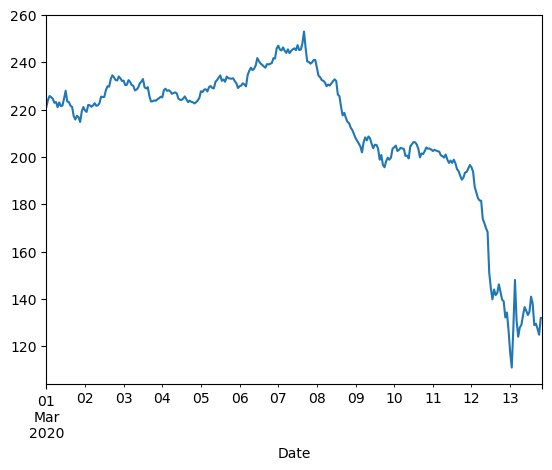

In [64]:
df_dt_2.loc['2020-03','High'].plot()

# Read & Write data to CSV/Excel/JSON

In [65]:
#1) write to csv
df_dt_2.to_csv('data/df_dt_2.csv',sep=',',encoding='utf-8')

In [66]:
#2) write to excel
df_dt_2.to_excel('data/df_dt_2.xlsx',header=True,encoding='utf-8',index=False)

In [67]:
#3) read from excel
df_dt_xlsx = pd.read_excel('data/df_dt_2.xlsx')
df_dt_xlsx.head()

,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [68]:
#4) write to json
df_dt_2.to_json('data/df_dt_2.json',orient='records',indent=4,lines=False)

In [69]:
#5) read from json
df_dt_json = pd.read_json('data/df_dt_2.json')
df_dt_json.head()

,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
